# Calcul du tenseur d'Eshelby dans le cas des ellipses

## 0 Quelques fonctions utiles

In [1]:
import numpy as np
from numpy import pi
from numpy.random import random_sample
from numpy.linalg import inv
from numpy import dot
from scipy.spatial.transform import Rotation as Rot
from classes_v2 import *

def Comp3333_to_66 (G) : 
    "Passe d'un tenseur de comportement  G 3x3x3x3 a une matrice de comportement F 6x6"
    F=np.zeros((6,6))
    for i in range(3):
        for j in range(3):
            F[i,j] = G[i,i,j,j]
            
        F[i,5]=(G[i,i,0,1]+G[i,i,1,0])/2.
        F[i,3]=(G[i,i,1,2]+G[i,i,2,1])/2. 
        F[i,4]=(G[i,i,2,0]+G[i,i,0,2])/2. 
        F[3,i]=(G[1,2,i,i]+G[2,1,i,i])/2. 
        F[4,i]=(G[0,2,i,i]+G[2,0,i,i])/2.
        F[5,i]=(G[0,1,i,i]+G[1,0,i,i])/2.

    F[4,4]=(G[0,2,0,2]+G[2,0,0,2]+G[0,2,2,0]+G[2,0,2,0])/4. 
    F[3,3]=(G[1,2,1,2]+G[2,1,1,2]+G[1,2,2,1]+G[2,1,2,1])/4.  
    F[5,5]=(G[0,1,0,1]+G[1,0,0,1]+G[0,1,1,0]+G[1,0,1,0])/4.  
    F[4,3]=(G[0,2,1,2]+G[2,0,1,2]+G[0,2,2,1]+G[2,0,2,1])/4.  
    F[4,5]=(G[0,2,1,0]+G[2,0,1,0]+G[0,2,0,1]+G[2,0,0,1])/4.  
    F[3,4]=(G[1,2,0,2]+G[2,1,0,2]+G[1,2,2,0]+G[2,1,2,0])/4.  
    F[5,4]=(G[0,1,0,2]+G[1,0,0,2]+G[0,1,2,0]+G[1,0,2,0])/4.  
    F[3,5]=(G[1,2,1,0]+G[2,1,1,0]+G[1,2,0,1]+G[2,1,0,1])/4.   
    F[5,3]=(G[0,1,1,2]+G[1,0,1,2]+G[0,1,2,1]+G[1,0,2,1])/4. 
    
    return F

def Comp66_to_3333(F) : 
    'Passe d une matrice F 6x6 à un tenseur G 3x3x3x3'
    G = np.zeros((3,3,3,3))
    for i in range(3) :
        for j in range(3) :
            G[i,i,j,j]=F[i,j]
       
        G[i,i,0,1]=F[i,5]
        G[i,i,1,2]=F[i,3]
        G[i,i,2,0]=F[i,4]
        G[0,2,i,i]=F[4,i]
        G[1,2,i,i]=F[3,i]
        G[0,1,i,i]=F[5,i]
        G[i,i,1,0]=F[i,5]
        G[i,i,2,1]=F[i,3]
        G[i,i,0,2]=F[i,4]
        G[2,0,i,i]=F[4,i]
        G[2,1,i,i]=F[3,i]
        G[1,0,i,i]=F[5,i]
        
    G[0,1,0,1]=F[5,5]
    G[0,1,0,2]=F[5,4]
    G[0,1,1,0]=F[5,5]
    G[0,1,1,2]=F[5,3] 
    G[0,1,2,0]=F[5,4]
    G[0,1,2,1]=F[5,3]

    G[0,2,0,1]=F[4,5]
    G[0,2,0,2]=F[4,4]
    G[0,2,1,0]=F[4,5]
    G[0,2,1,2]=F[4,3] 
    G[0,2,2,0]=F[4,4]
    G[0,2,2,1]=F[4,3]

    G[1,0,0,1]=F[5,5]
    G[1,0,0,2]=F[5,4]
    G[1,0,1,0]=F[5,5]
    G[1,0,1,2]=F[5,3] 
    G[1,0,2,0]=F[5,4]
    G[1,0,2,1]=F[5,3]

    G[1,2,0,2]=F[3,4]
    G[1,2,1,0]=F[3,5]
    G[1,2,1,2]=F[3,3] 
    G[1,2,2,0]=F[3,4]
    G[1,2,2,1]=F[3,3]

    G[2,0,0,1]=F[4,5]
    G[2,0,0,2]=F[4,4]
    G[2,0,1,0]=F[4,5]
    G[2,0,1,2]=F[4,3] 
    G[2,0,2,0]=F[4,4]
    G[2,0,2,1]=F[4,3]

    G[2,1,0,1]=F[3,5]
    G[2,1,0,2]=F[3,4]
    G[2,1,1,0]=F[3,5]
    G[2,1,1,2]=F[3,3] 
    G[2,1,2,0]=F[3,4]
    G[2,1,2,1]=F[3,3]
 
    return G 

def Rotation_angles():
    theta = 2*pi*np.random.random()
    psi = 2*pi*np.random.random()
    phi = np.arccos(np.random.random())
    return (phi,theta,psi)


def Matrice_rotation(psi,phi,theta) : 
    'Crée une matrice de rotation 3x3 à partir des trois angles d euler'
    Q = np.zeros((3,3))
    
    Q[0,0]=cos(psi)*cos(theta)-cos(phi)*sin(theta)*sin(psi)
    Q[0,1]=sin(theta)*cos(psi)+cos(phi)*sin(psi)*cos(theta)
    Q[0,2]=sin(phi)*sin(psi)
    Q[1,0]=-sin(psi)*cos(theta)-sin(theta)*cos(phi)*cos(psi)
    Q[1,1]=cos(psi)*cos(phi)*cos(theta)-sin(theta)*sin(psi)
    Q[1,2]=cos(psi)*sin(phi)
    Q[2,0]=sin(phi)*sin(theta)
    Q[2,1]=-sin(phi)*cos(theta)
    Q[2,2]=cos(phi)
    
    for i in range(3) : 
        for j in range(3):
            if (abs(Q[i,j]) < 10**-6 ) :
                Q[i,j] = 0
            
    return Q

def Matrices_rotation(n) : 
    'Crée une matrice de rotation 3x3 à partir des trois angles d euler'
    Q = np.zeros((n,3,3))
    for i in range(n) : 
        theta,phi,psi = Rot.random().as_euler('zxy', degrees=False)
        Q[i,0,0]=cos(psi)*cos(theta)-cos(phi)*sin(theta)*sin(psi)
        Q[i,0,1]=sin(theta)*cos(psi)+cos(phi)*sin(psi)*cos(theta)
        Q[i,0,2]=sin(phi)*sin(psi)
        Q[i,1,0]=-sin(psi)*cos(theta)-sin(theta)*cos(phi)*cos(psi)
        Q[i,1,1]=cos(psi)*cos(phi)*cos(theta)-sin(theta)*sin(psi)
        Q[i,1,2]=cos(psi)*sin(phi)
        Q[i,2,0]=sin(phi)*sin(theta)
        Q[i,2,1]=-sin(phi)*cos(theta)
        Q[i,2,2]=cos(phi)
    
        for j in range(3) : 
            for k in range(3):
                if (abs(Q[i,j,k]) < 10**-6 ) :
                    Q[i,j,k] = 0
            
    return Q

def Rotation_operator(n_renforts) : 
    B = np.zeros((n_renforts,3,3,3,3,3,3,3,3))
    R = np.zeros((n_renforts,3,3))
    for z in range(n_renforts) :
        theta,phi,psi = Rot.random().as_euler('zxy', degrees=False)
        R[z,0,0]=cos(psi)*cos(theta)-cos(phi)*sin(theta)*sin(psi)
        R[z,0,1]=sin(theta)*cos(psi)+cos(phi)*sin(psi)*cos(theta)
        R[z,0,2]=sin(phi)*sin(psi)
        R[z,1,0]=-sin(psi)*cos(theta)-sin(theta)*cos(phi)*cos(psi)
        R[z,1,1]=cos(psi)*cos(phi)*cos(theta)-sin(theta)*sin(psi)
        R[z,1,2]=cos(psi)*sin(phi)
        R[z,2,0]=sin(phi)*sin(theta)
        R[z,2,1]=-sin(phi)*cos(theta)
        R[z,2,2]=cos(phi)
        for  i in range(3) : 
            for  j in range(i+1):
                for  k in range(3):
                    for  l in range(k+1):
                        for  m in range(3):
                            for  n in range(3):
                                for  ll in range(3):
                                    for  kk in range(3):
                                        B[z,i,j,k,l,m,n,ll,kk] = R[z,i,m]*R[z,j,n]*R[z,k,ll]*R[z,l,kk]
    return B

def Rotation_tenseur(S,R,z) : 
    ' Renvoie la rotation du tenseur S par les 3 angles d Euler'
    B = np.zeros((3,3,3,3))
    for  i in range(3) : 
        for  j in range(i+1):
            for  k in range(3):
                for  l in range(k+1):
                    for  m in range(3):
                        for  n in range(3):
                            for  ll in range(3):
                                for  kk in range(3):
                                    B[i,j,k,l] += R[z,i,m]*R[z,j,n]*R[z,k,ll]*R[z,l,kk]*S[m,n,ll,kk]
                                    B[i,j,l,k] = B[i,j,k,l]
                                    B[j,i,k,l] = B[i,j,k,l]
                                    B[j,i,l,k] = B[i,j,k,l]
    return B

def Rotation_tenseur2(S,Operator,z) : 
    ' Renvoie la rotation du tenseur S par les 3 angles d Euler'
    B = np.zeros((3,3,3,3))
    for  i in range(3) : 
        for  j in range(i+1):
            for  k in range(3):
                for  l in range(k+1):
                    for  m in range(3):
                        for  n in range(3):
                            for  ll in range(3):
                                for  kk in range(3):
                                    B[i,j,k,l] += Operator[z,i,j,k,l,m,n,ll,kk]*S[m,n,ll,kk]
                                    B[i,j,l,k] = B[i,j,k,l]
                                    B[j,i,k,l] = B[i,j,k,l]
                                    B[j,i,l,k] = B[i,j,k,l]
    return B

def Rotation_tenseur3(S,Operator,z,B) : 
    ' Renvoie la rotation du tenseur S par les 3 angles d Euler '
    
    for  i in range(3) : 
        for  j in range(3):
            for  k in range(3):
                for  l in range(3):
                    B[i,j,k,l] = 0
                    
    for  i in range(3) : 
        for  j in range(i+1):
            for  k in range(3):
                for  l in range(k+1):
                    for  m in range(3):
                        for  n in range(3):
                            for  ll in range(3):
                                for  kk in range(3):
                                    B[i,j,k,l] += Operator[z,i,j,k,l,m,n,ll,kk]*S[m,n,ll,kk]                                    
  
                    B[i,j,l,k] = B[i,j,k,l]
                    B[j,i,k,l] = B[i,j,k,l]
                    B[j,i,l,k] = B[i,j,k,l]
    return B


def Matrice_Souplesse_Isotrope(E,nu) :
    'Renvoie la matrice de souplesse d un matériau isotrope'
    S = np.zeros((6,6))
    S[0,0]=1./E
    S[1,1]=1./E
    S[2,2]=1./E

    S[3,3]=2.*(1+nu)/E
    S[4,4]=2.*(1+nu)/E
    S[5,5]=2.*(1+nu)/E

    S[0,1]=-nu/E
    S[0,2]=-nu/E
    S[1,2]=-nu/E
    S[1,0]=-nu/E
    S[2,1]=-nu/E
    S[2,0]=-nu/E
    
    return S
    

def Young_isotrope(S) : 
    return 1/3 * (1/S[0,0]+1/S[1,1]+1/S[2,2])

def nu_isotrope(S) : 
    E = Young_isotrope(S)
    return - 1/3 * E * (S[0,1] +S[0,2] + S[1,2])

def Young_isotropeC(C) : 
    nu = nu_isotropeC(C)
    return 2 * (1+nu) * 1/3 *(C[3,3]+C[4,4]+C[5,5])

def nu_isotropeC(C) : 
    x = (C[0,0]+C[1,1]+C[2,2]) / (C[0,1]+C[0,2]+C[1,2])
    return 1/(1+x)

    
def Young_anisotrope(S) : 
    return 1/S[0,0],1/S[1,1],1/S[2,2]


def Compute_with_permutation(a,I,II,nu) : 
    S = np.zeros((3,3,3,3))
    
    for i in range(3) :
        S[i,i,i,i] = 3*a[i]**2*II[i][i] / (8*pi*(1-nu)) + I[i] * (1-2*nu)/(8*pi*(1-nu))
        j = (i+1)%3
        S[i,i,j,j] = a[j]**2*II[i][j]/(8*pi*(1-nu)) -  I[i] * (1-2*nu)/(8*pi*(1-nu))
        S[i,j,i,j] = (a[i]**2+a[j]**2)*II[i][j]/(16*pi*(1-nu)) + (1-2*nu)/(16*pi*(1-nu))*(I[i]+I[j])
        k = (i+2)%3
        S[i,i,k,k] = a[k]**2*II[i][k]/(8*pi*(1-nu)) -  I[i] * (1-2*nu)/(8*pi*(1-nu))
        S[i,k,i,k] = (a[i]**2+a[k]**2)*II[i][k]/(16*pi*(1-nu)) + (1-2*nu)/(16*pi*(1-nu))*(I[i]+I[k])
        
    return S

def Cyclic_permutation(S) : 
    for i in range(3) : 
        for j in range(3) :
            for k in range(3) : 
                for l in range(3) : 
                    val = non_zeros(S,i,j,k,l)
                    S[i,j,k,l] = val
                    S[i,j,l,k] = val
                    S[j,i,k,l] = val
                    S[j,i,l,k] = val
    return S
                    

def non_zeros(S,i,j,k,l) : 
    if S[i,j,k,l] != 0 : 
        return S[i,j,k,l]
    if S[i,j,l,k] != 0 : 
        return S[i,j,l,k]
    if S[j,i,k,l] != 0 : 
        return S[j,i,k,l]
    if S[j,i,l,k] != 0 : 
        return S[j,i,l,k]
    return 0

def clear_matrix3 (C,k) : 
    n = C.shape[0]
    for i in range(n) : 
        for j in range(n) :
            if C[i,j,k]<10**-8 : 
                C[i,j,k] = 0
                
def clear_matrix2 (C) : 
    n = C.shape[0]
    for i in range(n) : 
        for j in range(n) :
            if C[i,j]<10**-5 : 
                C[i,j] = 0
    

# Calcul du tenseur d'Eshelby dans le cas général

In [2]:
def Eshelby_tensor(Axis,Em,nu) : 
    
    Sm = Matrice_Souplesse_Isotrope(Em,nu)
    Cm = inv(Sm)
    Cm3 = Comp66_to_3333(Cm)
    a0,a1,a2 = Axis
    IJV = np.array([[0,0],[1,1],[2,2],[1,2],[0,2],[0,1]])
    Nit = 40
    Ntop = Nit
    Mtop = Nit
    dphi = pi/(Ntop-1)
    dtheta = pi/(Ntop-1)
    A = np.zeros((6,6))
    B = np.zeros((6,6,Mtop))
    G = np.zeros((6,6,Ntop))
    E = np.zeros((6,6))
    
    # Integration de la fonction de green sur la demi ellipsoïde
    for m in range(Mtop) : 
        phi = m*dphi
        for n in range(Ntop) : 
            theta = n*dtheta
            X = np.array([sin(theta)*cos(phi)/a0 , sin(theta)*sin(phi)/a1 , cos(theta)/a2])
            CXX = np.zeros((3,3))
            for i in range(3) :
                for j in range(3) :
                    for k in range(3) : 
                        for l in range(3) :
                            CXX[i,k] += Cm3[i,j,k,l]*X[j]*X[l]
            #print("CXX" , m,n) 
            #print(CXX) 
            CXX = inv(CXX)
            #print("CXX") 
            #print(CXX) 
            for i in range(6) :
                for j in range(6) :                     
                    I1 = IJV[i,0]
                    J1 = IJV[j,0]
                    I2 = IJV[i,1]
                    J2 = IJV[j,1]
                    G[i,j,n] = 0.5 * sin(theta) * (CXX[I1,J1]*X[I2]*X[J2] + CXX[I2,J1]*X[I1]*X[J2] + CXX[I1,J2]*X[I2]*X[J1] + CXX[I2,J2]*X[I1]*X[J1])
        
        
        B[:,:,m] = 0.5 * dtheta * (G[:,:,0]+G[:,:,Ntop-1])
        for i in range(1,Ntop-1) : 
            B[:,:,m] +=  dtheta * G[:,:,i]

    A = 0.5*(B[:,:,0]+B[:,:,Ntop-1])* dphi/(4*pi)
    for i in range(1,Ntop-1) : 
         A += B[:,:,i]* dphi/(4*pi)  
    
    for i in range(6) : 
        for j in range(6) : 
            E[i,j]=A[i,0]*Cm[0,j]+A[i,1]*Cm[1,j]+A[i,2]*Cm[2,j] + 4* (A[i,3]*Cm[3,j]+A[i,4]*Cm[4,j]+A[i,5]*Cm[5,j]) 
    
    return E

# Schema differentiel

In [8]:
def Differentiel2(Cm, inclusion_behaviors):
    
        """
        Calcule le comportement élastique homogène équivalent. 
        Renvoie un dict de comportement.
        Cm: (dict), dictionnaire du comportement de la matrice
        inclusion_behaviors(list), format [(Cf, f, aspect_ratio)] avec Cf les dictionnaires de comportement des inclusions et aspect_ratio un tuple contenant les deux valeurs de rapports de forme
        Ch (f+df) = Ch(f) + 1/fm * Somme sur i (dfi*(Ci-Ch)*Aeshi)  avec Aeshi = (I+Esh*Sm*(Ci-Cm))**-1
        """
        
        n_renforts = 1     # paramètre non physique qui permet de forcer lisotropie
        n_pas = 100
        
        Sm = Cm['S']
        Cm = Cm['C']
        Id = np.identity(6) 

        #Création des matrices de rotations
        Rotation_Op = Rotation_operator(n_renforts) 
        B = np.zeros((3,3,3,3))

        
        # Initialisation de la solution diluée : 
        Ch = Cm
        Sh = Sm        
        
        # Calculs préléminaires :
        Esh = []
        df = []
        Cf = []
        for i in range (len(inclusion_behaviors)) :
            Cfi = inclusion_behaviors[i][0]['C']
            fi = inclusion_behaviors[i][1]
            Ai = (1,inclusion_behaviors[i][2][0],inclusion_behaviors[i][2][0])     
            
            Esh.append(Eshelby_tensor(Ai,Em,num))
            df.append(fi/n_pas)
            Cf.append(Cfi)
        
        for k in range (1,n_pas+1) :             
            dCh = np.zeros((6,6))
            fm_pas = 1
            for i in range(len(inclusion_behaviors)) :
                DCi = Cf[i]-Ch
                Aeshi = inv(Id + np.matmul(Esh[i],np.matmul(Sh,DCi)))                
                fi_pas = df[i]*k
                fm_pas -= fi_pas
                # Ajout des contribution de chaque renfort en fonction de son orientation     
                DCi3 = Comp66_to_3333(DCi)
                DCi3R= np.zeros((3,3,3,3))
                for j in range(n_renforts) : 
                    DCi3R += Rotation_tenseur3(DCi3,Rotation_Op,i,B)
                DCi6 = Comp3333_to_66(DCi3R)
                RCi = df[i]/n_renforts * DCi6
                dCh += np.matmul(RCi,Aeshi)

            Ch = Ch + 1/fm_pas*dCh
            Sh = inv(Ch)
        #print(k," pas effectué sur ",n_pas)
        #print('f = ',fi,' E = :',Young_isotropeC(Ch))
        E = Young_isotropeC(Ch)
        nu = nu_isotropeC(Ch)

        return E,nu
    


f= 0.0
f= 0.07071428571428572
f= 0.14142857142857143
f= 0.21214285714285713
f= 0.28285714285714286
f= 0.3535714285714286
f= 0.42428571428571427
f= 0.495
f= 0.5657142857142857
f= 0.6364285714285715
f= 0.7071428571428572
f= 0.7778571428571429
f= 0.8485714285714285
f= 0.9192857142857143
f= 0.99


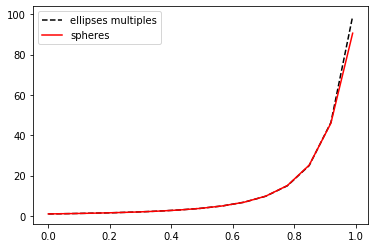

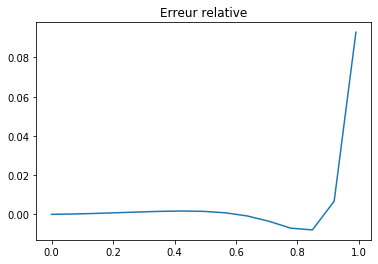

In [9]:
from classes2 import * 
Ef,Em = 100,1
nuf,num = 0.3,0.3
ar = (1,1)
Sm = Matrice_Souplesse_Isotrope(Em,num)
Cm = inv(Sm)

Sf = Matrice_Souplesse_Isotrope(Ef,nuf)
Cf = inv(Sf)

inclusion_behavior = {'C':Cf , 'S':Sf}
matrix_behavior = {'C': Cm, 'S': Sm}

inclusion_behavior2 = {'E':Ef , 'nu':nuf}
matrix_behavior2 = {'E': Em, 'nu': num}

inclusion = Inclusion(0,inclusion_behavior2)

F = np.linspace(0,0.99,15)
LE1,LE2,LE3,LEr = [],[],[],[]

for i in range(len(F)) : 
    f = F[i]
    print("f=",f)
    microstructure = Microstructure(matrix_behavior2,{inclusion : f})

    E2,nu2 = Differentiel2(matrix_behavior,[[inclusion_behavior,f,ar]])
    E3 = Differential_Scheme().compute_h_behavior(microstructure)['E']
    Er = (E2-E3)/E3
    
    
    LE2.append(E2)
    LE3.append(E3)
    LEr.append(Er)


plt.plot(F,LE2,'--k',label = "ellipses multiples")
plt.plot(F,LE3,'r',label = "spheres")
plt.legend()
plt.show()

plt.plot(F,LEr)
plt.title("Erreur relative")
plt.show()


In [11]:
print(LE3)
print(LE2)

[0.9999999999999999, 1.1570085719717682, 1.3529523187651677, 1.6016790642253624, 1.9237013268269503, 2.350381354535536, 2.931460799851802, 3.7492805062090357, 4.947151793913409, 6.7895649007415315, 9.798776635812775, 15.085273684291177, 25.179807119322383, 46.03435498309969, 90.6110000042786]
[1.0, 1.157209274311588, 1.3535679673099086, 1.6029802045252817, 1.9259978826646076, 2.3539595529928588, 2.936410891681066, 3.7549694345420925, 4.950997450903351, 6.783986155337872, 9.76402623644041, 14.979066225574915, 24.979748748331936, 46.34220597087754, 99.02432108410846]
